# Trying to boost a category (concept)

In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model = keras.models.load_model(os.path.join('models', 'painter_model'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

In [4]:
dirname = "painters_ds"

In [5]:
wdf = pd.read_json('./data/' + dirname + ".json")
wdf.head(3)

,category,input,output
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
http://dbpedia.org/resource/Howardena_Pindell,[http://dbpedia.org/resource/United_States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
http://dbpedia.org/resource/Étienne_Moreau-Nélaton,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [80]:
dfs = []
for filename in os.listdir(os.path.join('visualizer_data', 'activations', dirname)):
    if filename.split('.')[-1] == 'pkl' and 'table_data' not in filename and 'n_' not in filename:
        print(filename)
        dfs.append(pd.read_pickle(os.path.join('visualizer_data', 'activations', dirname, filename)))

0 - embedding.pkl
1 - lstm.pkl
2 - dense.pkl
3 - dropout.pkl
4 - dense_1.pkl
5 - dense_2.pkl
embedding-not-mean.pkl


In [177]:
layer_to_explore = 1
df = dfs[layer_to_explore]
print(f"Using layer {model.layers[layer_to_explore].name}")

Using layer lstm


In [178]:
df.head(1)

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,-2.623116,-2.860991,-3.245079,3.274848,2.256125,2.262309,2.80754,2.687105,2.852292,2.716022,-2.292368,2.573856,-2.865345,-2.715131,-3.220397,2.600156


In [179]:
df.iloc[0, 4:]

neuron_1    -2.623116
neuron_2    -2.860991
neuron_3    -3.245079
neuron_4     3.274848
neuron_5     2.256125
neuron_6     2.262309
neuron_7      2.80754
neuron_8     2.687105
neuron_9     2.852292
neuron_10    2.716022
neuron_11   -2.292368
neuron_12    2.573856
neuron_13   -2.865345
neuron_14   -2.715131
neuron_15   -3.220397
neuron_16    2.600156
Name: http://dbpedia.org/resource/Alexander_Semionov, dtype: object

In [180]:
def plot_activ(df, df2=None, df3=None):
    
#     plt.figure(figsize=(15, 6))
#     sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()
    
#     plt.figure(figsize=(15, 6))
#     sns.scatterplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.scatterplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Visualizing sample vs cat')
    
    sns.lineplot(ax=axes[0], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[0].set_title('Line plot')
    
    
    sns.scatterplot(ax=axes[1], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[1].set_title('Scatter plot')
    
    fig.legend(['df1', 'df2', 'df3'])
    
    
def get_cat_df(df, cat):
    return df[df.category.apply(lambda x: cat in x)]

def get_mean_activations(df):
    df_act = df.iloc[:, 4:]
    return df_act.mean()

In [181]:
cat = 'http://dbpedia.org/resource/Russia'

In [182]:
df_cat = get_cat_df(df, cat)
df_mean_cat = get_mean_activations(df_cat)
df_mean_cat = pd.DataFrame(df_mean_cat).T
df_mean_cat

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
0,-0.85123,-1.236198,-1.337484,1.481616,1.241373,1.104437,1.281065,1.262762,1.243303,0.605301,-1.10829,1.192863,-1.1966,-1.197568,-1.354328,1.178662


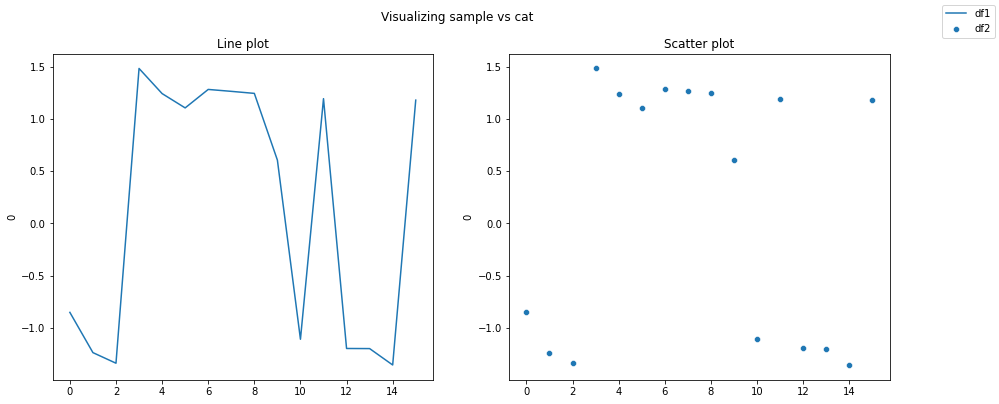

In [183]:
plot_activ(df_mean_cat)

In [184]:
def get_sample(df, cat=None):
    if cat is None:
        return df[df.pred != df.true].sample(n=1)
    else:
        return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)

In [185]:
cat

'http://dbpedia.org/resource/Russia'

In [186]:
sample = get_sample(df, 'http://dbpedia.org/resource/Russia')
sample

C:\Users\maxim\AppData\Local\Temp/ipykernel_18948/370248897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)


,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
http://dbpedia.org/resource/Rudolph_F._Zallinger,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0.357408,0.578453,0.0246,-0.362478,-0.628482,-0.729422,-0.624447,-0.712696,-0.722554,-0.429393,0.560015,-0.613872,0.566683,0.574989,0.489017,-0.490434


In [187]:
activations_cols = [x for x in sample.columns if "neuron" in x]
df_act_sample = sample.loc[:, activations_cols]
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
http://dbpedia.org/resource/Rudolph_F._Zallinger,0.357408,0.578453,0.0246,-0.362478,-0.628482,-0.729422,-0.624447,-0.712696,-0.722554,-0.429393,0.560015,-0.613872,0.566683,0.574989,0.489017,-0.490434


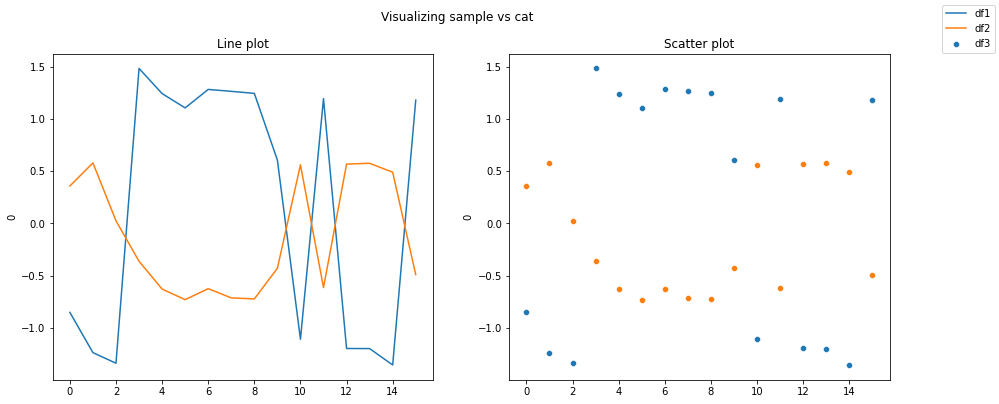

In [188]:
plot_activ(df_mean_cat, df_act_sample)

In [189]:
def get_diffs(df, sample_df):
    return sample_df.reset_index().drop(columns=['index']) - df

In [190]:
diffs = get_diffs(df_mean_cat, df_act_sample)
diffs

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
0,1.208637,1.814651,1.362083,-1.844094,-1.869855,-1.833858,-1.905512,-1.975457,-1.965857,-1.034694,1.668305,-1.806735,1.763284,1.772557,1.843345,-1.669096


In [191]:
avg_diff = abs(diffs).sum().sum()/len(diffs.iloc[0, :])
print(f"Average difference is: {avg_diff}")

Average difference is: 1.708626389503479


### Re-adjust activations

On rapproche les activations du sample vers les activations de la catégorie cible d'un facteur 10% sur les neurones dont la différence est significative (i.e. pvalue < 0.01).

On a alors besoin de 3 éléments:
* le dataframe des activations du sample
* le dataframe des activations moyennes de la catégorie cible
* le dataframe des pvalues de la catégorie cible (avec maybe l'information sur la significativité de la pvalue, ici fixée à <= 0.01)

In [192]:
russia_pv = pd.read_pickle('src/russia-pv.pkl')
dfrpv = pd.DataFrame(russia_pv, columns=['pvalue'])
dfrpv

,pvalue
0,1.587716e-01
1,4.878287e-09
2,6.452485e-05
3,1.579483e-06
4,1.897656e-13
...,...
59,4.158541e-02
60,3.111701e-04
61,1.502952e-06
62,9.974529e-02


In [193]:
dfrpv['sign'] = dfrpv['pvalue'] <= 0.01
print(dfrpv[dfrpv['sign'] == True].shape)
print(dfrpv[dfrpv['sign'] == True])

(42, 2)
          pvalue  sign
1   4.878287e-09  True
2   6.452485e-05  True
3   1.579483e-06  True
4   1.897656e-13  True
5   2.738027e-11  True
7   3.096681e-03  True
9   3.773218e-03  True
10  1.769776e-03  True
12  1.351876e-13  True
14  7.951155e-24  True
15  2.011291e-03  True
17  6.368204e-23  True
19  6.570767e-03  True
21  5.796425e-05  True
22  3.067940e-07  True
23  5.675254e-05  True
24  1.612688e-10  True
26  9.286252e-11  True
29  1.690230e-06  True
30  3.268496e-09  True
31  1.080565e-11  True
32  5.932947e-03  True
33  1.684570e-11  True
34  2.491615e-03  True
36  2.208312e-03  True
40  4.088773e-18  True
41  3.012649e-08  True
42  1.058638e-14  True
43  6.252875e-12  True
44  2.203407e-05  True
46  1.785589e-24  True
47  9.985386e-08  True
49  9.544518e-05  True
50  1.910548e-19  True
51  2.097827e-18  True
52  8.469099e-08  True
53  1.930613e-16  True
56  2.021712e-03  True
58  6.567423e-05  True
60  3.111701e-04  True
61  1.502952e-06  True
63  2.292984e-04  True


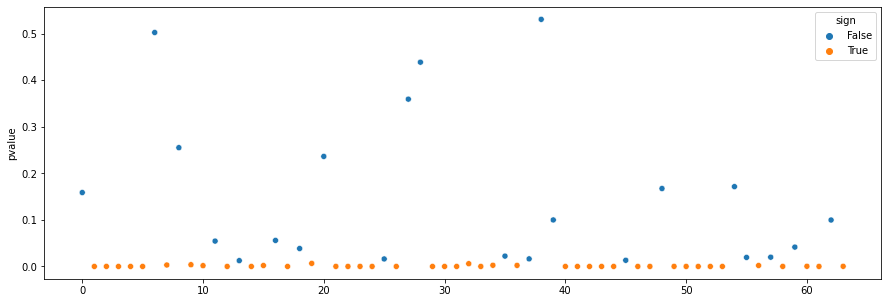

In [194]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=range(len(dfrpv['pvalue'])), y='pvalue', 
                hue='sign', data=dfrpv)
plt.show()

Pvalue dataframe with significant bool value (example for russia here)

In [195]:
dfrpv

,pvalue,sign
0,1.587716e-01,False
1,4.878287e-09,True
2,6.452485e-05,True
3,1.579483e-06,True
4,1.897656e-13,True
...,...,...
59,4.158541e-02,False
60,3.111701e-04,True
61,1.502952e-06,True
62,9.974529e-02,False


In [196]:
df_mean_cat # mean activations for a category (here russia)

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
0,-0.85123,-1.236198,-1.337484,1.481616,1.241373,1.104437,1.281065,1.262762,1.243303,0.605301,-1.10829,1.192863,-1.1966,-1.197568,-1.354328,1.178662


In [197]:
df_act_sample # activations for a misclassified sample of the category

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
http://dbpedia.org/resource/Rudolph_F._Zallinger,0.357408,0.578453,0.0246,-0.362478,-0.628482,-0.729422,-0.624447,-0.712696,-0.722554,-0.429393,0.560015,-0.613872,0.566683,0.574989,0.489017,-0.490434


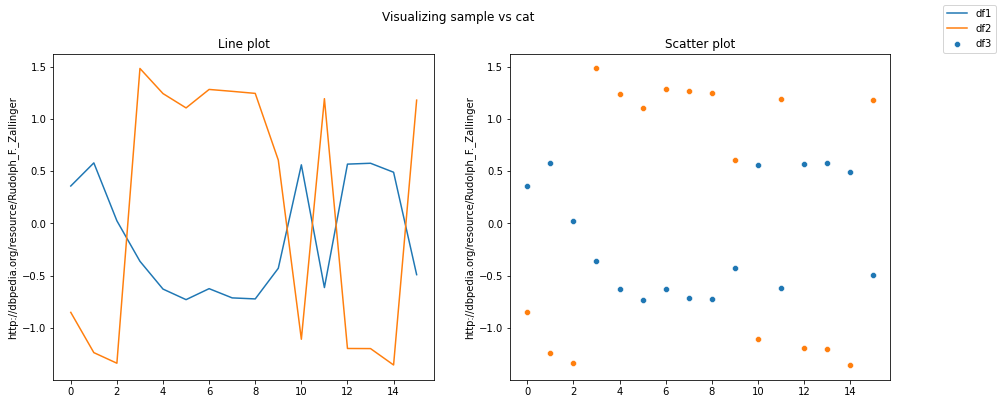

In [198]:
plot_activ(df=df_act_sample, df2=df_mean_cat)
# df in blue
# df2 in orange

In [199]:
dfrpv.set_index(df_act_sample.T.index, inplace=True)
dfrpv

ValueError: Length mismatch: Expected 64 rows, received array of length 16

The formula for the new data point is : 

$$ s' = s - d * f $$

where $s'$ is the new value, $s$ is the activation value of the sample, $d$ is the difference between the sample activation and the mean activation (on the same neuron) and $f$ is the factor

In [200]:
def boost(sample, category, pvalue=None):
    """
    both of the 3 elements have the same shape
    pvalues might be reached directly from this function
    """
    
    factor = 0.3 # i.e. 10%
    
    # We built a proper dataset to process the data
    df = pd.concat([sample, category, pvalue]).T
    df.columns = [
        'sample', 'cat', 'pvalue', 'sign'
    ]
    
    df['new_value'] = df['sample']
    
    for i in range(df.shape[0]):
        index = f"neuron_{i+1}"
        if df.loc[index, "sign"] == True:
            df.loc[index, "new_value"] = df.loc[index, 'sample'] - (df.loc[index, 'sample'] - df.loc[index, 'cat']) * factor
    
    return df

In [201]:
dfb = boost(df_act_sample, df_mean_cat, dfrpv.T)
dfb

KeyError: 'neuron_17'

In [202]:
dfb.fillna(value=dfb[dfb['sign'] == False]['new_value'])

,sample,cat,pvalue,sign,new_value
neuron_1,0.658161,0.165338,0.158772,False,0.658161
neuron_2,0.216791,-0.519022,0.0,True,-0.003953
neuron_3,0.366989,-0.310005,0.000065,True,0.163891
neuron_4,-0.414313,0.391009,0.000002,True,-0.172717
neuron_5,0.076518,-0.775784,0.0,True,-0.179172
...,...,...,...,...,...
neuron_60,-0.549509,0.102303,0.041585,False,-0.549509
neuron_61,0.481932,-0.253206,0.000311,True,0.261391
neuron_62,-0.269602,0.417666,0.000002,True,-0.063421
neuron_63,0.762598,0.167214,0.099745,False,0.762598


In [203]:
dfb[dfb['sign'] == False]['sample']

neuron_1     0.658161
neuron_7    -0.620409
neuron_9     -0.22806
neuron_12    0.489868
neuron_14   -0.518356
neuron_17   -0.554116
neuron_19   -0.648848
neuron_21   -0.830194
neuron_26    0.516728
neuron_28    0.761017
neuron_29   -0.783623
neuron_36   -0.570199
neuron_38   -0.569421
neuron_39    0.663978
neuron_40   -0.670759
neuron_46    0.587953
neuron_49   -0.700524
neuron_55    0.677345
neuron_56    0.585726
neuron_58    -0.63338
neuron_60   -0.549509
neuron_63    0.762598
Name: sample, dtype: object

### Display the new visualization

In [204]:
dfb['sample'].values

array([0.6581613421440125, 0.21679137647151947, 0.3669893741607666,
       -0.4143131375312805, 0.0765184611082077, 1.1435259580612183,
       -0.6204090118408203, 0.6390779614448547, -0.2280600368976593,
       -0.6536741852760315, -0.7849778532981873, 0.4898676872253418,
       0.45933762192726135, -0.5183560848236084, -0.0684097558259964,
       -0.47500503063201904, -0.5541162490844727, 0.9833938479423523,
       -0.6488479971885681, -0.6887383460998535, -0.8301936984062195,
       -0.4071020781993866, 0.3965878486633301, -0.4834771156311035,
       -0.5514059066772461, 0.5167279839515686, -0.7315905094146729,
       0.7610173225402832, -0.783622682094574, -0.13433462381362915,
       -0.8616790175437927, -0.4350149929523468, 0.5660584568977356,
       -0.7044545412063599, 0.54903244972229, -0.5701994299888611,
       0.9390217661857605, -0.5694212317466736, 0.6639783978462219,
       -0.6707590818405151, -0.5688298344612122, 0.5104914903640747,
       0.11340848356485367, 0.576659

In [205]:
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,neuron_11,neuron_12,neuron_13,neuron_14,neuron_15,neuron_16
http://dbpedia.org/resource/Rudolph_F._Zallinger,0.357408,0.578453,0.0246,-0.362478,-0.628482,-0.729422,-0.624447,-0.712696,-0.722554,-0.429393,0.560015,-0.613872,0.566683,0.574989,0.489017,-0.490434


<AxesSubplot:ylabel='sample'>

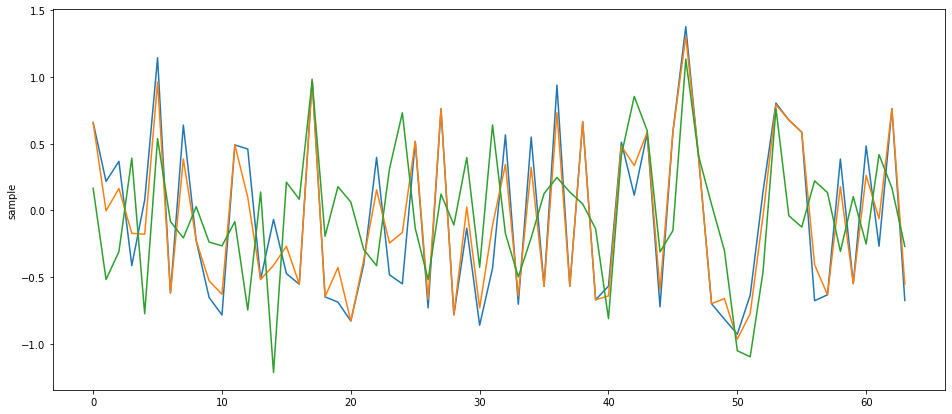

In [206]:
#plot_activ(df=pd.DataFrame(dfb['new_value']).T, df2=pd.DataFrame(dfb['cat']).T)
plt.figure(figsize=(16, 7))
df = pd.DataFrame(dfb['sample']).T
df2 = pd.DataFrame(dfb['new_value']).T
df3 = pd.DataFrame(dfb['cat']).T
sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
sns.lineplot(x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])

We see on the visualization above that the second df (i.e. the new value) has became much closer

### Re-build the back of the model and make a prediction

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

Instead of re-building the model as we did to get activations of each layer, we want to build the part after the layer we are getting closer the activations of.

Thus, new computed activations become the inputs for the rest of the model.

In [112]:
rest_model = Sequential()
for i in range(layer_to_explore + 1, len(model.layers)):
    rest_model.add(model.layers[i])

rest_model.build(input_shape=model.layers[0].output_shape) #input_shape
rest_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5,361
Trainable params: 5,361
Non-trainable params: 0
_________________________________________________________________


In [113]:
new_activations = dfb['new_value']
new_activations

neuron_1     0.658161
neuron_2      0.14321
neuron_3      0.29929
neuron_4    -0.333781
neuron_5    -0.008712
               ...   
neuron_60   -0.549509
neuron_61    0.408419
neuron_62   -0.200875
neuron_63    0.762598
neuron_64   -0.635306
Name: new_value, Length: 64, dtype: object

In [114]:
new_shape = model.layers[layer_to_explore].output_shape[-1]

nas = np.asarray(new_activations).astype('float32').reshape(-1, 1, new_shape)
print(nas.shape)
print(nas)

(1, 1, 64)
[[[ 0.65816134  0.14321     0.29928997 -0.33378097 -0.00871179
    1.082914   -0.620409    0.5544662  -0.22806004 -0.6121449
   -0.733094    0.4898677   0.33861092 -0.5183561  -0.18318798
   -0.40644574 -0.55411625  0.98202175 -0.648848   -0.6021279
   -0.8301937  -0.39575106  0.3154074  -0.40409923 -0.42313883
    0.516728   -0.71038485  0.7610173  -0.7836227  -0.08138476
   -0.81825274 -0.32749647  0.49208853 -0.68393517  0.4735206
   -0.57019943  0.8697366  -0.56942123  0.6639784  -0.6707591
   -0.59320456  0.50087136  0.18741436  0.57880807 -0.6825779
    0.5879531   1.3530195   0.39190567 -0.70052433 -0.7648336
   -0.9416788  -0.68241054  0.08414271  0.79983914  0.677345
    0.5857264  -0.58818954 -0.6333795   0.31522322 -0.54950947
    0.4084185  -0.20087494  0.7625979  -0.6353055 ]]]


In [115]:
rest_model.predict(nas)

1/1 [==============================] - 0s 481ms/step


array([[0.467962]], dtype=float32)

## Testing an issue point

The main issue we could get is that we're taking the mean of the embedding to display the activations, so we saved it like that.
Now, we want to 'boost' the activations for the Embedding layer but we took the mean.

Let's see if the result from the mean and the original (not meaned) activations are really that different.

In [116]:
sample_index = sample.index[0]
sample_index

'http://dbpedia.org/resource/Grigoriy_Myasoyedov'

In [117]:
sample_inputs = np.array([np.array(x) for x in wdf[wdf.index == sample_index].input])

sample_inputs

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 9981,   19, 9260, 7866,   27, 4303, 1344,
          25,   19,  243,    1,  187, 

In [118]:
fp_model = Sequential()
fp_model.add(model.layers[0])
fp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [119]:
fp_sample_act = fp_model.predict(sample_inputs)

1/1 [==============================] - 0s 28ms/step


In [120]:
rest_model.predict(fp_sample_act)

1/1 [==============================] - 0s 289ms/step


array([[0.2669904]], dtype=float32)

So, for the original activations, we get **0.297**

In [121]:
sample_mean_act = np.array(df_act_sample).reshape(-1, 1, 64)

In [122]:
rest_model.predict(sample_mean_act)

1/1 [==============================] - 0s 13ms/step


array([[0.3768038]], dtype=float32)

THERE IS A BIG DIFFERENCE

That means, we must retrieve the original activations (without the mean) in order to boost these activations at the level of the Embedding layer because it seems that this is the layer which make the global decision for the output

## Boosting raw embedding activations

Here is the raw flattened activations for each sample

In [123]:
r_emb = pd.read_pickle(os.path.join('src', 'visualizer_data', 'activations', 'painters_ds', 'embedding-raw.pkl'))
r_emb.head(3)

,category,input,true,pred,0,1,2,3,4,5,...,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.01824,0.033064,0.045167,-0.038204,0.027363,-0.002155,...,0.025399,-0.004341,0.011990,-0.020601,-0.033220,0.000651,-0.011725,-0.001298,0.017007,-0.053795
http://dbpedia.org/resource/Howardena_Pindell,[http://dbpedia.org/resource/United_States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0.01824,0.033064,0.045167,-0.038204,0.027363,-0.002155,...,0.005946,-0.005843,-0.018723,0.017572,0.050071,-0.022547,-0.010346,-0.030369,-0.025394,0.010117
http://dbpedia.org/resource/Étienne_Moreau-Nélaton,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.01824,0.033064,0.045167,-0.038204,0.027363,-0.002155,...,0.012612,-0.026737,0.062191,0.017014,-0.036809,-0.040097,0.022566,0.034972,-0.009373,0.000477


In [124]:
raw_sample = r_emb[r_emb.index == sample_index]
raw_sample

,category,input,true,pred,0,1,2,3,4,5,...,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
http://dbpedia.org/resource/Grigoriy_Myasoyedov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0.01824,0.033064,0.045167,-0.038204,0.027363,-0.002155,...,0.030528,0.049858,0.012698,-0.071667,-0.042861,-0.017713,-0.016438,0.017237,0.034438,-0.076419


In [125]:
raw_sample_act = raw_sample.iloc[0, 4:] # Fetching only the activation columns
print(raw_sample_act.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9590, 9591, 9592, 9593, 9594, 9595, 9596, 9597, 9598, 9599],
      dtype='object', length=9600)


To get the activations as the layer returns them, we need to reshape

In [126]:
sample_act = raw_sample_act.to_numpy().reshape(-1, 64)
sample_act.shape

(150, 64)

In [127]:
sample_act

array([[0.018239787, 0.0330644, 0.045167074, ..., -0.037980087,
        0.034873746, -0.012977618],
       [0.018239787, 0.0330644, 0.045167074, ..., -0.037980087,
        0.034873746, -0.012977618],
       [0.018239787, 0.0330644, 0.045167074, ..., -0.037980087,
        0.034873746, -0.012977618],
       ...,
       [0.010368197, -0.012283085, -0.04622255, ..., -0.027397815,
        0.042705424, -0.00422934],
       [-0.042906422, 0.040920224, -0.00549499, ..., 0.035804406,
        0.014588775, 0.053970594],
       [-7.618315e-05, -0.042107813, 0.0096192835, ..., 0.017237121,
        0.034437772, -0.076419234]], dtype=object)

![boost_instructions.png](boost_instructions.png)

In [128]:
def get_mean_raw_act(df):
    return df.mean()

In [129]:
get_mean_raw_act(pd.DataFrame(raw_sample_act))

http://dbpedia.org/resource/Grigoriy_Myasoyedov   -0.000586
dtype: float64

In [130]:
pd.DataFrame(pd.DataFrame(raw_sample_act.to_numpy().reshape(-1, 64)).mean()).T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.016052,0.027816,0.039976,-0.034601,0.023909,-0.000702,-0.030384,0.042883,-0.019626,-0.039004,...,0.065174,0.07301,-0.022192,-0.062318,0.036882,-0.069497,0.03343,-0.033159,0.032142,-0.012357


In [132]:
df[df.index == sample_index]

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Grigoriy_Myasoyedov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0.658161,0.216791,0.366989,-0.414313,0.076518,1.143526,...,0.677345,0.585726,-0.678071,-0.63338,0.384524,-0.549509,0.481932,-0.269602,0.762598,-0.675882
